# 🏛️ Capacidade de Pagamento de Municípios - Um Problema de Classificação 📈

<div align="justify"> A avaliação da capacidade de pagamento dos estados é um instrumento fundamental para a gestão financeira e o progresso econômico das cidades. Esse indicador analisa a relação entre as receitas e despesas, bem como o nível de endividamento e o cumprimento das obrigações fiscais, desempenhando um papel crucial na tomada de decisões financeiras.</div>
<br>
<div align="justify"> O Tesouro Nacional utiliza esse indicador como ferramenta primordial para avaliar a viabilidade e o risco de conceder empréstimos e garantias aos municípios. Além disso, a capacidade de pagamento dos estados desempenha um papel significativo na obtenção de financiamento para grandes projetos, atraindo investimentos diversos e empresas de grande porte, além de estimular o crescimento econômico e a criação de empregos. Um estado com uma sólida capacidade de pagamento demonstra eficiência administrativa, responsabilidade fiscal e potencial de expansão, aumentando sua credibilidade e competitividade no mercado.</div>
<br>
<div align="justify"> Assim, a capacidade de prever se um município é um bom pagador desempenha um papel crucial na elaboração de políticas públicas, na alocação eficiente de recursos, na promoção de oportunidades de negócios e na melhoria da qualidade de vida da população.</div>
<br>

_Este notebook busca prever a capacidade de pagamento de municípios utilizando técnicas aprendidas no módulo de Machine Learning I._

### 📥 Importação de Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


### 📦 Extração

In [2]:
# Carregando as planilhas necessárias

dados_2018 = pd.read_excel('./capag2018.xlsx')
dados_2019 = pd.read_excel('./capag2019.xlsx')
dados_2020 = pd.read_csv('./capag2020.csv', sep=';')
dados_2021 = pd.read_excel('./capag2021.xlsx')
dados_2022 = pd.read_excel('./capag2022.xlsx')
dados_2023 = pd.read_excel('./capag2023.xlsx')

### 🛠️ Transformação

#### A intenção dessa transformação é verificar se existem colunas divergentes nas bases de dados e colocá-las em um formato que possa ser concatenado depois

| Colunas            | Significado                                       |
|---------------------|------------------------------------------------------------------|
| Coluna A            | Instituição Nome do órgão responsável pela informação          |
| Coluna B            | Cod. IBGE Código IBGE do município                            |
| Coluna C            | UF Unidade Federativa do município                             |
| Coluna D            | População População do município                                |
| Coluna E            | Indicador 1 Valor percentual resultante do cálculo do indicador de endividamento |
| Coluna F            | Nota 1 Classificação atribuída (A, B, C ou N.D.), conforme o percentual calculado para o Indicador 1 |
| Coluna G            | Indicador 2 Valor percentual resultante do cálculo do indicador de poupança corrente |
| Coluna H            | Nota 2 Classificação atribuída (A, B, C ou N.D.), conforme o percentual calculado para o Indicador 2 |
| Coluna I            | Indicador 3 Valor percentual resultante do cálculo do indicador de liquidez |
| Coluna J            | Nota 3 Classificação atribuída (A, C ou N.D.), conforme o percentual calculado para o Indicador 3 |
| Coluna K            | Classificação da CAPAG Nota atribuída à capacidade de pagamento. É o resultado da combinação das notas 1, 2 e 3. |


In [3]:
# Adicionando Coluna de Ano

dados_2018['Ano'] = 2018
dados_2019['Ano'] = 2019
dados_2020['Ano'] = 2020
dados_2021['Ano'] = 2021
dados_2022['Ano'] = 2022
dados_2023['Ano'] = 2023

In [4]:
# Visualizando os dados
dados_2018.head()

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Ano
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,NaN,NaN,n.d.,0.900312,B,NaN,n.d.,n.d.,2018
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,7037.0,0.250647,A,0.943001,B,NaN,n.d.,n.d.,2018
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,NaN,NaN,n.d.,0.938168,B,NaN,n.d.,n.d.,2018
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23574.0,0.877674,B,0.954212,C,NaN,n.d.,n.d.,2018
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,151934.0,0.004168,A,0.965144,C,0.605537,A,C,2018


In [5]:
dados_2019.head()

,Instituição,Cod.IBGE,UF,População,Indicador 1,Nota 1,Indicador 2,Nota 2,Indicador 3,Nota 3,Classificação da CAPAG,Informações de 23/07/2019,Ano
0,Prefeitura Municipal de São Paulo - SP,3550308,SP,12106920,0.885938,B,0.946296,B,0.248712,A,B,NaN,2019
1,Prefeitura Municipal de Rio de Janeiro - RJ,3304557,RJ,6520266,0.750576,B,1.005038,C,-2.685960,C,C,NaN,2019
2,Prefeitura Municipal de Salvador - BA,2927408,BA,2953986,0.214276,A,0.925658,B,0.198697,A,B,NaN,2019
3,Prefeitura Municipal de Fortaleza - CE,2304400,CE,2627482,0.220810,A,0.947008,B,0.088504,A,B,NaN,2019
4,Prefeitura Municipal de Belo Horizonte - MG,3106200,MG,2523794,0.406984,A,0.935169,B,0.242524,A,B,NaN,2019


A base de dados de 2019 possui uma coluna divergente das demais e por isso teve que ser excluída

In [6]:
dados_2019.drop(columns=['Informações de 23/07/2019'], inplace=True)

A forma como o nome das colunas da base de dados de 2019 está disposta também diverge das demais e por isso foi renomeada

In [7]:
dados_2019 = dados_2019.rename(columns={
    'Indicador 1': 'Indicador_1',
    'Nota 1': 'Nota_1',
    'Indicador 2': 'Indicador_2',
    'Nota 2': 'Nota_2',
    'Indicador 3': 'Indicador_3',
    'Nota 3': 'Nota_3',
    'Classificação da CAPAG':'Classificação_CAPAG'
})

In [8]:
dados_2020.head()

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação da CAPAG,Ano
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,8583.0,"0,127976496",A,"0,906314496",B,"0,962423688",A,B,2020
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,6972.0,"0,165696027",A,"0,90987563",B,"0,774738727",A,B,2020
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,19614.0,"0,154622885",A,"0,959243401",C,"1,832419324",C,C,2020
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23223.0,"0,310158289",A,"0,901489297",B,"0,13432183",A,B,2020
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,156292.0,"0,031986086",A,"0,961195332",C,"0,882159646",A,C,2020


A base de dados de 2020 também possuia nome de coluna divergente da maioria das bases e por isso foi renomeado

In [9]:
# Renomeie as colunas para remover "_Revisão"

dados_2020 = dados_2020.rename(columns={
    'Classificação da CAPAG':'Classificação_CAPAG'
})

In [10]:
dados_2021.head()

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Ano
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,8773.0,0.081363,A,0.892515,A,0.541470,A,A,2021
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,6989.0,0.127232,A,0.883673,A,0.161661,A,A,2021
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,20042.0,0.188573,A,0.946614,B,2.226206,C,C,2021
3,Prefeitura Municipal de Abaeté - MG,3100203,MG,23237.0,0.256274,A,0.828041,A,0.176959,A,A,2021
4,Prefeitura Municipal de Abaetetuba - PA,1500107,PA,157698.0,0.568016,A,0.945540,B,NaN,n.d.,n.d.,2021


In [11]:
dados_2022.head()

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,...,Precisa_Revisão,Indicador_1_Revisão,Nota_1_Revisão,Indicador_2_Revisão,Nota_2_Revisão,Indicador_3_Revisão,Nota_3_Revisão,CAPAG_Revisão,CAPAG_Oficial,Ano
0,Abadia de Goiás - GO,5200050,GO,8958.0,0.049231,A,0.802305,A,0.410061,A,...,Sim,0.043850,A,0.798083,A,0.197663,A,A,A,2022
1,Abadia dos Dourados - MG,3100104,MG,7006.0,0.116904,A,0.847358,A,0.164742,A,...,Sim,0.144454,A,0.829838,A,0.074475,A,A,A,2022
2,Abadiânia - GO,5200100,GO,20461.0,0.261832,A,0.968873,C,1.206272,C,...,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2022
3,Abaeté - MG,3100203,MG,23250.0,0.237102,A,0.791449,A,0.024213,A,...,Sim,0.207851,A,0.815874,A,0.185586,A,A,A,2022
4,Abaetetuba - PA,1500107,PA,160439.0,0.007074,A,1.020698,C,NaN,n.d.,...,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n.d.,2022


Na base de dados de 2022 houve uma alteração e os dados precisaram ser revistos, por isso aos dados que constam como "Não precisa de Revisão" copiamos os valores anteriores à revisão para a coluna semelhante a da maioria das bases e após isso excluímos as colunas sobressalentes e renomeamos as antigas colunas para que elas ficassem semelhante a da maioria das bases

In [12]:
condicao = dados_2022['Precisa_Revisão'] == 'Não'

# Copie os valores das colunas originais para as colunas de revisão usando índices
dados_2022.loc[condicao, ['Indicador_1_Revisão', 'Nota_1_Revisão', 'Indicador_2_Revisão', 'Nota_2_Revisão', 'Indicador_3_Revisão', 'Nota_3_Revisão']] = dados_2022.loc[condicao, ['Indicador_1', 'Nota_1', 'Indicador_2', 'Nota_2', 'Indicador_3', 'Nota_3']].values


In [13]:
dados_2022.drop(columns=['Precisa_Revisão','Classificação_CAPAG','Ano_Base','Indicador_1','Nota_1','Indicador_2','Nota_2','Indicador_3','Nota_3','CAPAG_Revisão'], inplace=True)

In [14]:
# Renomeie as colunas para remover "_Revisão"

dados_2022 = dados_2022.rename(columns={
    'Indicador_1_Revisão': 'Indicador_1',
    'Nota_1_Revisão': 'Nota_1',
    'Indicador_2_Revisão': 'Indicador_2',
    'Nota_2_Revisão': 'Nota_2',
    'Indicador_3_Revisão': 'Indicador_3',
    'Nota_3_Revisão': 'Nota_3',
    'CAPAG_Oficial':'Classificação_CAPAG'
})

In [15]:
dados_2023.head(3)

,Município,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Ano_Base,CAPAG_Oficial,Ano
0,Abadia de Goiás - GO,5200050,GO,9158.0,0.043850,A,0.797984,A,0.176475,A,2022,A,2023
1,Abadia dos Dourados - MG,3100104,MG,7022.0,0.144454,A,0.887513,B,0.074475,A,2022,B,2023
2,Abadiânia - GO,5200100,GO,20873.0,0.226715,A,0.966677,C,0.402439,A,2022,C,2023


Uma coluna da base de dados de 2023 precisou ser renomeada e precisamos excluir uma coluna de Ano Base

In [16]:
dados_2023.drop(columns=['Ano_Base'], inplace=True)

In [17]:
# Renomeie as colunas para remover "_Revisão"

dados_2023 = dados_2023.rename(columns={
    'CAPAG_Oficial':'Classificação_CAPAG'
})

In [18]:
# Unindo todos os datasets

dados_unidos = pd.concat([dados_2018, dados_2019,dados_2020,dados_2021,dados_2022,dados_2023])
dados_unidos.head(3)

,Instituição,Cod.IBGE,UF,População,Indicador_1,Nota_1,Indicador_2,Nota_2,Indicador_3,Nota_3,Classificação_CAPAG,Ano,Município
0,Prefeitura Municipal de Abadia de Goiás - GO,5200050,GO,NaN,NaN,n.d.,0.900312,B,NaN,n.d.,n.d.,2018,NaN
1,Prefeitura Municipal de Abadia dos Dourados - MG,3100104,MG,7037.0,0.250647,A,0.943001,B,NaN,n.d.,n.d.,2018,NaN
2,Prefeitura Municipal de Abadiânia - GO,5200100,GO,NaN,NaN,n.d.,0.938168,B,NaN,n.d.,n.d.,2018,NaN


In [19]:
# Entendendo a quantidade de linhas e de colunas

dados_unidos.shape

(33168, 13)

In [20]:
# Entendendo o tipo das variáveis

dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33168 entries, 0 to 5322
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Instituição          22276 non-null  object 
 1   Cod.IBGE             33168 non-null  int64  
 2   UF                   33168 non-null  object 
 3   População            31895 non-null  float64
 4   Indicador_1          30593 non-null  object 
 5   Nota_1               33168 non-null  object 
 6   Indicador_2          31280 non-null  object 
 7   Nota_2               33168 non-null  object 
 8   Indicador_3          25882 non-null  object 
 9   Nota_3               33168 non-null  object 
 10  Classificação_CAPAG  33168 non-null  object 
 11  Ano                  33168 non-null  int64  
 12  Município            10892 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.5+ MB


In [21]:
# Excluindo colunas que não parecem ter relevância para o target escolhido

dados_unidos.drop(columns=['Município', 'Instituição'],inplace=True)

In [22]:
# Entendendo a quantidade de nulos e duplicados

duplicados = dados_unidos.duplicated().sum()
nulos = dados_unidos.isnull().sum()

In [23]:
print(f'{duplicados.sum()} duplicados e {nulos.sum()} nulos')

0 duplicados e 13022 nulos


In [24]:
# Excluindo os dados nulos, visto que como temos um target que precisa de todas as informações para que possa ser definido, não podemos ter valores nulos

dados_unidos.dropna(inplace=True)

In [25]:
print(f'{duplicados.sum()} duplicados e {nulos.sum()} nulos')

0 duplicados e 13022 nulos


Optamos por utilizar a Regressão Logística por ser uma técnica que lida bem com problemas de classificação binária, como o nosso de prever se um município é capaz de pagar ou não, ao mesmo tempo em que oferece resultados de fácil interpretação.

Para o modelo de regressão logística precisamos de um target binário e de variáveis explicativas numéricas. Começaremos, usando encoding nas variáveis categóricas e depois modificando o target para que tenhamos 2 classificações (0, 1) sendo 1 a classe de capaz de pagar e 0 não capaz de pagar

In [26]:
#Entendendo variáveis categóricas

dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24419 entries, 4 to 5322
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod.IBGE             24419 non-null  int64  
 1   UF                   24419 non-null  object 
 2   População            24419 non-null  float64
 3   Indicador_1          24419 non-null  object 
 4   Nota_1               24419 non-null  object 
 5   Indicador_2          24419 non-null  object 
 6   Nota_2               24419 non-null  object 
 7   Indicador_3          24419 non-null  object 
 8   Nota_3               24419 non-null  object 
 9   Classificação_CAPAG  24419 non-null  object 
 10  Ano                  24419 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [27]:
# Encodando o UF

dados_unidos['UF']=LabelEncoder().fit_transform(dados_unidos['UF'])

In [28]:
dicionario_nota = {
    'A':1,
    'B':1,
    'C':0,
    'N.D.':0
}

In [29]:
# Encodando as variáveis de nota para que elas sejam numéricas posteriormente

dados_unidos['Nota_1']=dados_unidos['Nota_1'].map(dicionario_nota)
dados_unidos['Nota_2']=dados_unidos['Nota_2'].map(dicionario_nota)
dados_unidos['Nota_3']=dados_unidos['Nota_3'].map(dicionario_nota)
dados_unidos['Classificação_CAPAG']=dados_unidos['Classificação_CAPAG'].map(dicionario_nota)

In [30]:
# Substituindo as  vírgulas por pontos na coluna de Indicador
dados_unidos['Indicador_1'] = dados_unidos['Indicador_1'].str.replace(',', '.')


In [31]:
# Excluindo os valores nulos decorrente dessa exclusão

dados_unidos.dropna(inplace=True)

In [32]:
# Convertendo  a coluna para float
dados_unidos['Indicador_1'] = dados_unidos['Indicador_1'].astype(float)

In [33]:
dados_unidos.isnull().sum()

Cod.IBGE               0
UF                     0
População              0
Indicador_1            0
Nota_1                 0
Indicador_2            0
Nota_2                 0
Indicador_3            0
Nota_3                 0
Classificação_CAPAG    0
Ano                    0
dtype: int64

In [34]:
# Substituindo as  vírgulas por pontos na coluna de Indicador
dados_unidos['Indicador_2'] = dados_unidos['Indicador_2'].str.replace(',', '.')

In [35]:
# Excluindo os valores nulos decorrente dessa exclusão

dados_unidos.dropna(inplace=True)

In [36]:
dados_unidos = dados_unidos[~dados_unidos.apply(lambda row: row.astype(str).str.contains('#NÚM!').any(), axis=1)]

In [37]:
# Convertendo  a coluna para float
dados_unidos['Indicador_2'] = dados_unidos['Indicador_2'].astype(float)

<ipython-input-37-b5dfbd1e179b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_unidos['Indicador_2'] = dados_unidos['Indicador_2'].astype(float)


In [38]:
dados_unidos.isnull().sum()

Cod.IBGE               0
UF                     0
População              0
Indicador_1            0
Nota_1                 0
Indicador_2            0
Nota_2                 0
Indicador_3            0
Nota_3                 0
Classificação_CAPAG    0
Ano                    0
dtype: int64

In [39]:
# Excluindo os valores nulos decorrente dessa exclusão

dados_unidos.dropna(inplace=True)

In [40]:
# Substituindo as vírgulas por pontos na coluna
dados_unidos['Indicador_3'] = dados_unidos['Indicador_3'].str.replace(',', '.')

In [41]:
# Excluindo os valores nulos decorrente dessa exclusão

dados_unidos.dropna(inplace=True)

In [42]:
# Convertendo a coluna para float

dados_unidos['Indicador_3'] = dados_unidos['Indicador_3'].astype(float)

In [43]:
dados_unidos.isnull().sum()

Cod.IBGE               0
UF                     0
População              0
Indicador_1            0
Nota_1                 0
Indicador_2            0
Nota_2                 0
Indicador_3            0
Nota_3                 0
Classificação_CAPAG    0
Ano                    0
dtype: int64

In [44]:
# Entendendo quais colunas precisamos ou não

dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3960 entries, 0 to 5566
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod.IBGE             3960 non-null   int64  
 1   UF                   3960 non-null   int64  
 2   População            3960 non-null   float64
 3   Indicador_1          3960 non-null   float64
 4   Nota_1               3960 non-null   int64  
 5   Indicador_2          3960 non-null   float64
 6   Nota_2               3960 non-null   int64  
 7   Indicador_3          3960 non-null   float64
 8   Nota_3               3960 non-null   float64
 9   Classificação_CAPAG  3960 non-null   float64
 10  Ano                  3960 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 371.2 KB


In [45]:
#Excluindo o ID de identificação

dados_unidos.drop(columns=['Cod.IBGE'], inplace = True)

### 🚚 Carregamento

In [46]:
X = dados_unidos.drop(columns = 'Classificação_CAPAG')

In [47]:
y = dados_unidos['Classificação_CAPAG']

### 📈 Modelo de Regressão Logística

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [49]:
X_train.shape[0]

3168

In [50]:
X_test.shape[0]

792

In [51]:
modelo = LogisticRegression(max_iter=1000)

In [52]:
modelo.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
modelo.score(X_train, y_train)

0.6057449494949495

In [54]:
y_pred = modelo.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.6060606060606061

In [56]:
f1_score(y_test, y_pred)

0.0

In [57]:
recall_score(y_test, y_pred)

0.0

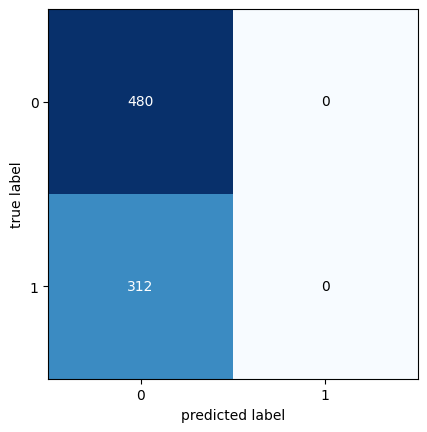

In [58]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [59]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.61      0.75       792
         1.0       0.00      0.00      0.00         0

    accuracy                           0.61       792
   macro avg       0.50      0.30      0.38       792
weighted avg       1.00      0.61      0.75       792



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 🧐📚Conclusões e Considerações Finais

Abaixo seguem as explicações referentes as métricas

* A precisão é a proporção de verdadeiros positivos em relação a todos os exemplos classificados como positivos. A alta precisão para a classe 0 (82%) indica que quando o modelo prevê que um município não é um bom pagador (classe 0), ele geralmente está correto. A precisão mais baixa para a classe 1 (42%) indica que quando o modelo prevê que um município é um bom pagador (classe 1), ele tem uma taxa significativa de falsos positivos. Isso pode significar que nosso modelo, por ter menos exemplos de classes 1, ele não generaliza tão bem para essa classe.


* O recall é a proporção de verdadeiros positivos em relação a todos os exemplos verdadeiros positivos. A revocação de 69% para a classe 0 significa que o modelo identifica corretamente 69% dos municípios que realmente não são bons pagadores. A revocação de 60% para a classe 1 indica que o modelo identifica corretamente 60% dos municípios que são bons pagadores. Isso significa que o modelo generaliza razoavelmente bem para ambas as classes ainda que penalizando a classe 1.


* O F1-Score é a média harmônica da precisão e da revocação. Ele equilibra essas duas métricas e representa um equilíbrio entre precisão e revocação. Para a classe 0, o F1-Score é de 0,75, e para a classe 1, é de 0,50.
Nesse caso percebemos novamente uma penalização para a classe 1.

Em suma, o modelo parece ser melhor em identificar municípios não bons pagadores (classe 0) do que bons pagadores (classe 1).